# **Rainfall Prediction Models With PCA**

# **Random Forest**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Reduced dataset.csv')

In [3]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rfc = RandomForestClassifier(n_estimators=128, bootstrap=False, max_features=4, oob_score=False)

In [7]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=128)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[32251  1807]
 [ 5264  4316]]


              precision    recall  f1-score   support

       False       0.86      0.95      0.90     34058
        True       0.70      0.45      0.55      9580

    accuracy                           0.84     43638
   macro avg       0.78      0.70      0.73     43638
weighted avg       0.83      0.84      0.82     43638



# **Logistic Regression**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/Reduced dataset.csv')
pd.set_option("display.max_columns", None)

In [11]:
df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'RainTomorrow'],
      dtype='object')

In [12]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [17]:
y_pred = log_model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.95      0.90     22726
        True       0.68      0.42      0.52      6366

    accuracy                           0.83     29092
   macro avg       0.77      0.68      0.71     29092
weighted avg       0.82      0.83      0.81     29092



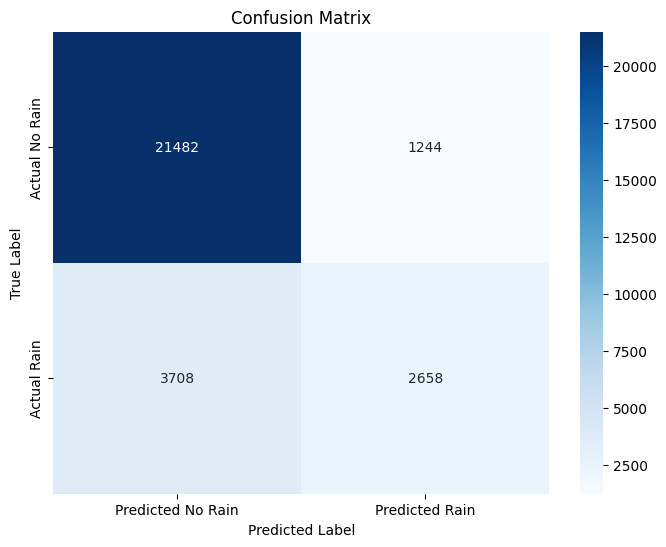

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

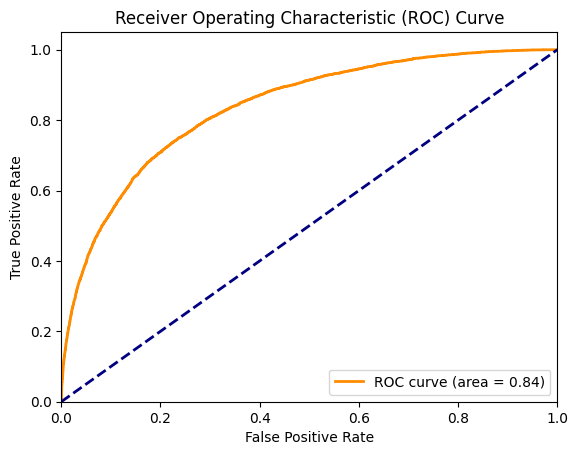

In [20]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_model.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Decision Tree**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/content/Reduced dataset.csv')

In [23]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    print(pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(['Feature Importance']))
    print('\n')

In [27]:
report_model(model)

              precision    recall  f1-score   support

       False       0.85      0.84      0.85     34058
        True       0.45      0.47      0.46      9580

    accuracy                           0.76     43638
   macro avg       0.65      0.66      0.65     43638
weighted avg       0.76      0.76      0.76     43638



      Feature Importance
PC11            0.051207
PC9             0.054660
PC12            0.056490
PC10            0.056897
PC4             0.058624
PC7             0.059804
PC6             0.060217
PC8             0.061429
PC13            0.064112
PC5             0.067295
PC3             0.068019
PC1             0.083282
PC2             0.257965




# **Naive Bayes**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/content/Reduced dataset.csv')

In [31]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

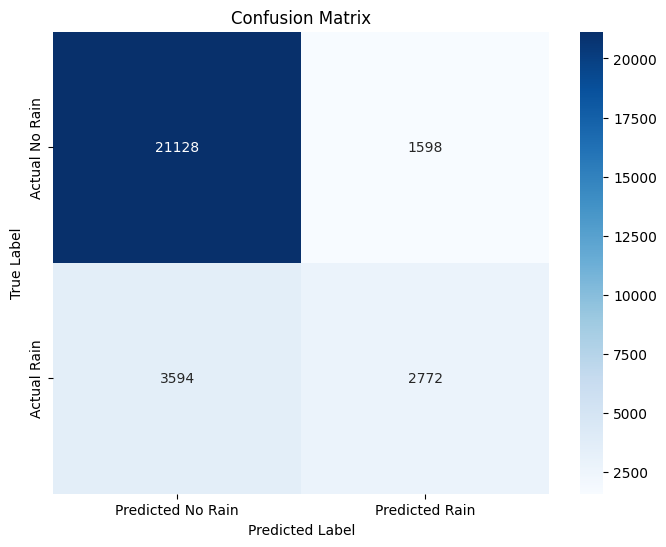

              precision    recall  f1-score   support

       False       0.85      0.93      0.89     22726
        True       0.63      0.44      0.52      6366

    accuracy                           0.82     29092
   macro avg       0.74      0.68      0.70     29092
weighted avg       0.81      0.82      0.81     29092



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = gnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test, y_pred))

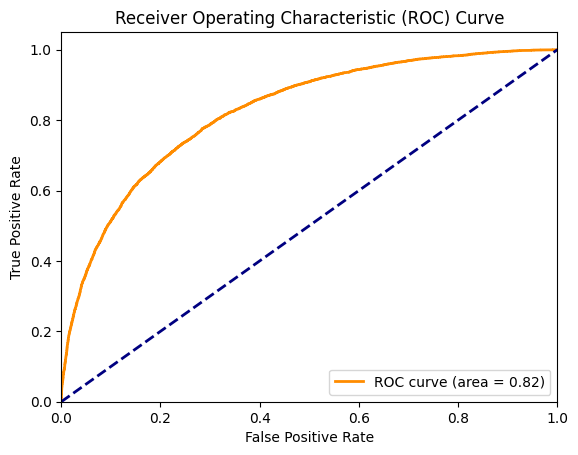

In [35]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = gnb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Artificial Neural Network**

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
df = pd.read_csv('/content/Reduced dataset.csv')
pd.set_option("display.max_columns", None)

In [38]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.917123,-0.989051,-2.247827,-0.334443,0.807366,1.416575,0.748832,-0.499977,-1.215516,1.222871,-2.105833,-0.221107,0.588575,False
1,1.174135,0.293917,-2.852850,-1.289379,0.655859,1.200021,1.157208,-0.188419,-0.821333,1.007782,-1.630549,-1.334270,-0.464132,False
2,1.782059,-0.801753,-2.072926,-0.001682,-0.497981,1.934214,0.866245,-0.061038,-1.638167,0.373370,-1.746895,-0.438013,-0.169095,False
3,2.513838,2.786418,0.065938,0.406823,1.078596,2.321191,1.976793,-0.571006,1.337436,-1.307408,0.759693,0.043168,-0.228548,False
4,1.337444,-1.402310,-0.386066,-1.891255,-0.146052,2.963744,0.761437,0.364900,-0.703809,0.490273,-0.123157,0.461421,2.004174,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083291,3.717595,0.178249,1.472680,1.059254,1.243142,-0.465823,-1.173868,-1.591414,-0.183396,-0.240542,-0.156639,-0.381700,False
145456,0.017570,2.530786,-1.493913,-0.974231,0.510773,2.000113,-0.667787,0.344556,1.314210,2.062914,0.013595,1.574669,0.177982,False
145457,0.723980,2.186017,-1.345525,-0.705006,0.762100,1.645124,-0.586874,-0.136527,0.549743,1.498499,-1.335232,1.344399,0.173301,False
145458,1.138248,2.773601,-0.737286,-0.401495,1.368001,1.103656,-0.423628,-0.634946,-0.787863,1.276614,0.190215,0.626883,0.236019,False


In [39]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 13)

In [41]:
from tensorflow.keras import layers, models, optimizers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)
model = models.Sequential()
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=13))
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
opt = optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7795 - loss: 0.5406 - val_accuracy: 0.7823 - val_loss: 0.4039
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7823 - loss: 0.4236 - val_accuracy: 0.7823 - val_loss: 0.4017
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7818 - loss: 0.4216 - val_accuracy: 0.7823 - val_loss: 0.4002
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7785 - loss: 0.4260 - val_accuracy: 0.7823 - val_loss: 0.3995
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7813 - loss: 0.4204 - val_accuracy: 0.7823 - val_loss: 0.3984
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7808 - loss: 0.4195 - val_accuracy: 0.7823 - val_loss: 0.3977
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7813 - loss: 0.4181 - val_accuracy: 0.8355 - val_loss: 0.3968
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8304 - l

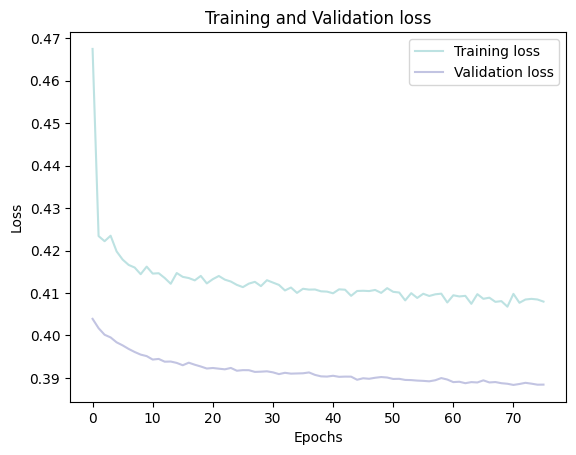

In [42]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

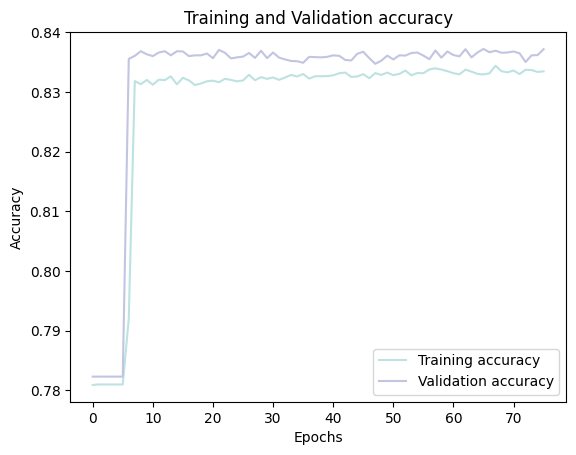

In [43]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

       False       0.86      0.94      0.90     22672
        True       0.67      0.46      0.55      6420

    accuracy                           0.83     29092
   macro avg       0.77      0.70      0.72     29092
weighted avg       0.82      0.83      0.82     29092



910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


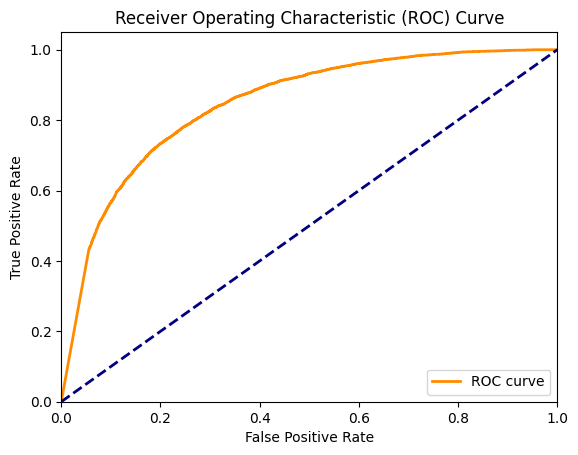

AUC: 0.8457998028776077


In [45]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

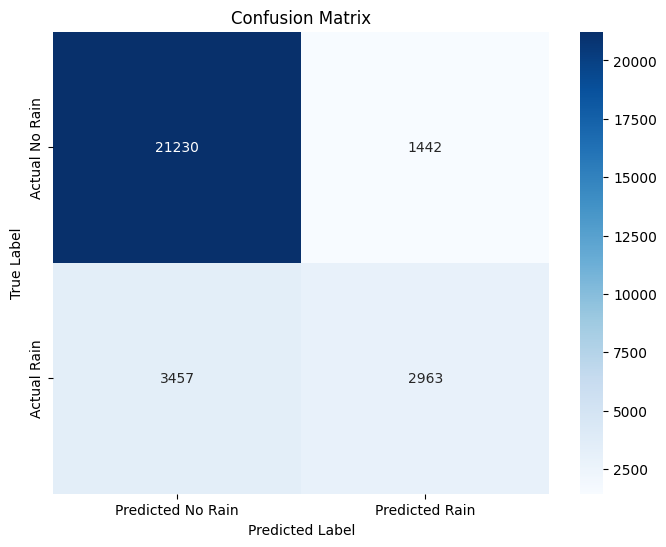

In [46]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()